In [4]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the WAV file
sample_rate, data = wavfile.read('data/neurolink/006c6dd6-d91e-419c-9836-c3f320da4f25.wav')



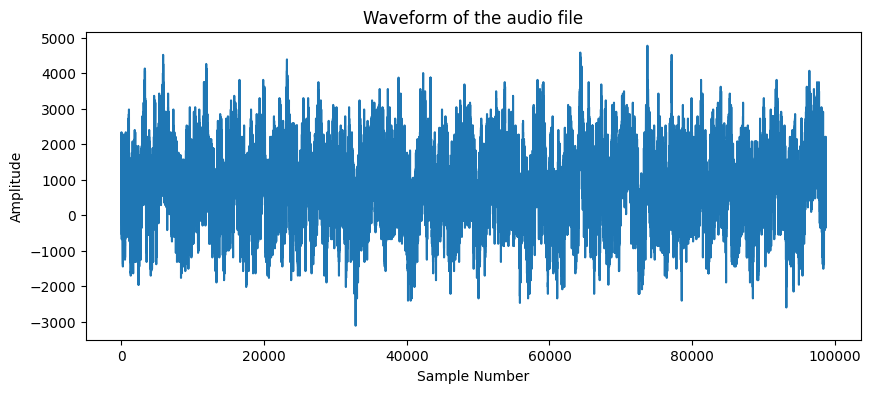

In [5]:

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Waveform of the audio file')
plt.ylabel('Amplitude')
plt.xlabel('Sample Number')
plt.show()

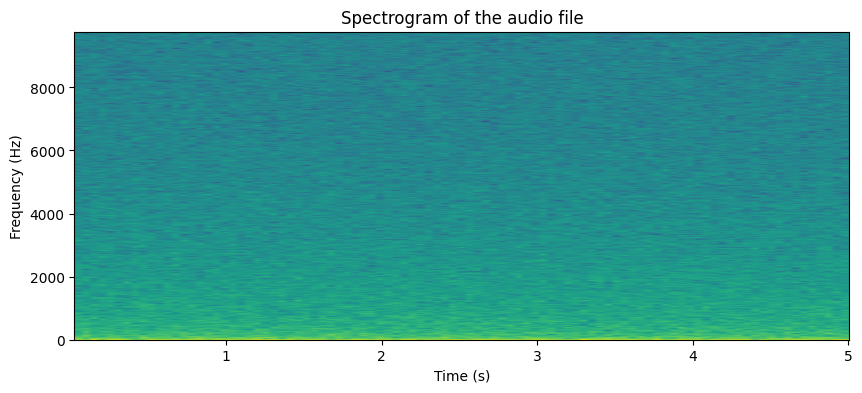

In [4]:
# Plot the spectrogram

plt.figure(figsize=(10, 4))
plt.specgram(data, Fs=sample_rate, NFFT=2048, noverlap=1024)
plt.title('Spectrogram of the audio file')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.show()

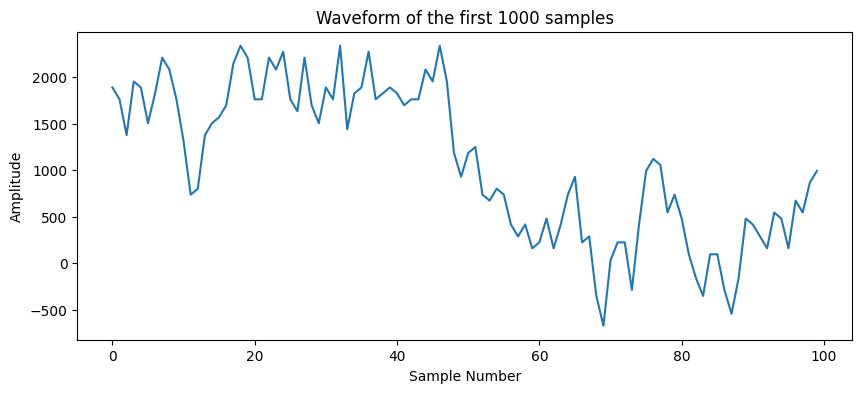

In [7]:
# Plot only the first N samples

N = 100

plt.figure(figsize=(10, 4))
plt.plot(data[:N])
plt.title('Waveform of the first 1000 samples')
plt.ylabel('Amplitude')
plt.xlabel('Sample Number')
plt.show()


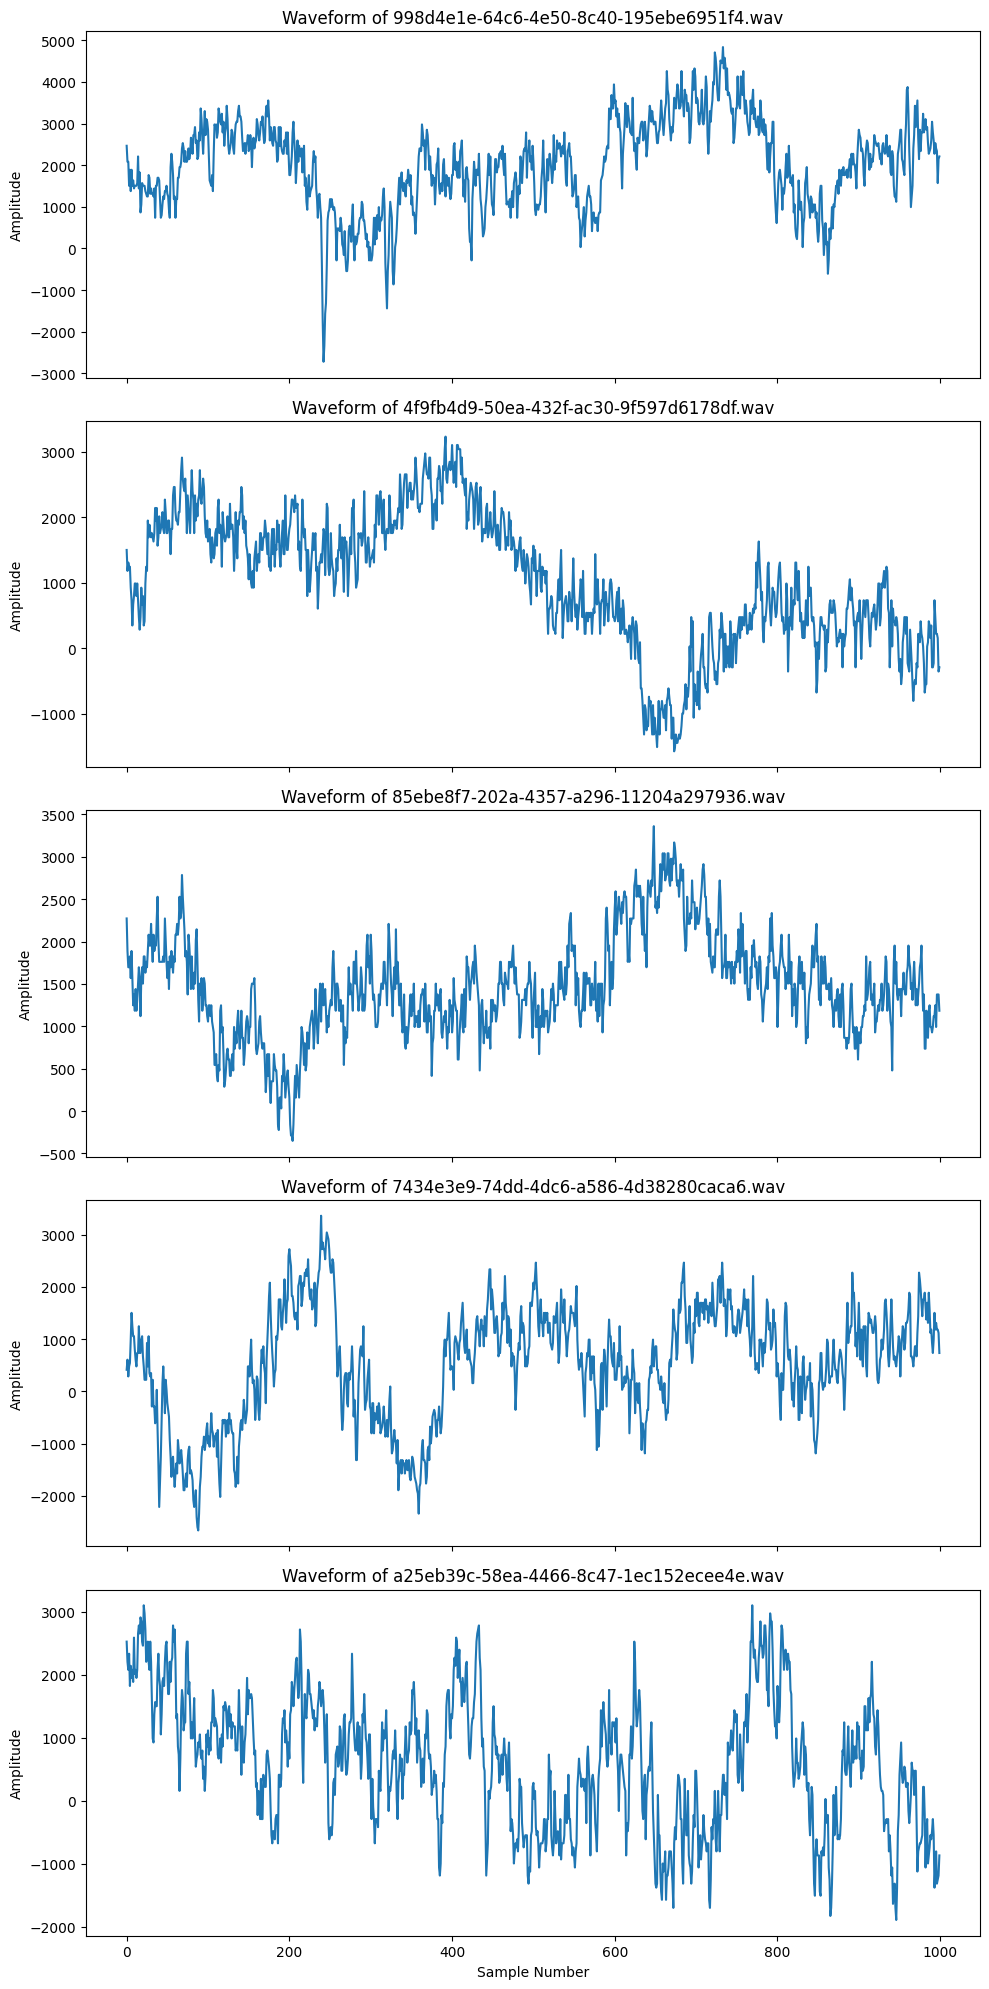

In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

def plot_waveforms_from_folder(folder_path, files_to_plot=5, data_cutoff=None):
    # Get the list of all .wav files in the folder
    wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
    
    if files_to_plot is not None:
        wav_files = wav_files[:files_to_plot]
    
    num_files = len(wav_files)
    
    if num_files == 0:
        print("No WAV files found in the folder.")
        return

    # Set up the figure with subplots
    fig, axes = plt.subplots(num_files, 1, figsize=(10, 4 * num_files), sharex=True)
    
    # If there's only one file, axes won't be an array, so we make it an array for consistency
    if num_files == 1:
        axes = [axes]
    
    # Loop over each file, read and plot the waveform
    for i, wav_file in enumerate(wav_files):
        file_path = os.path.join(folder_path, wav_file)
        
        # Load the WAV file
        sample_rate, data = wavfile.read(file_path)
        
        # Plot the waveform in the corresponding subplot
        if data_cutoff is not None:
            data = data[:data_cutoff]
        axes[i].plot(data)
        axes[i].set_title(f'Waveform of {wav_file}')
        axes[i].set_ylabel('Amplitude')
    
    # Set common x-label for the last subplot
    axes[-1].set_xlabel('Sample Number')
    
    # Adjust layout for better appearance
    plt.tight_layout()
    plt.show()

# Example usage
plot_waveforms_from_folder('data/neurolink', data_cutoff=1000)  # Replace with the actual path to your folder


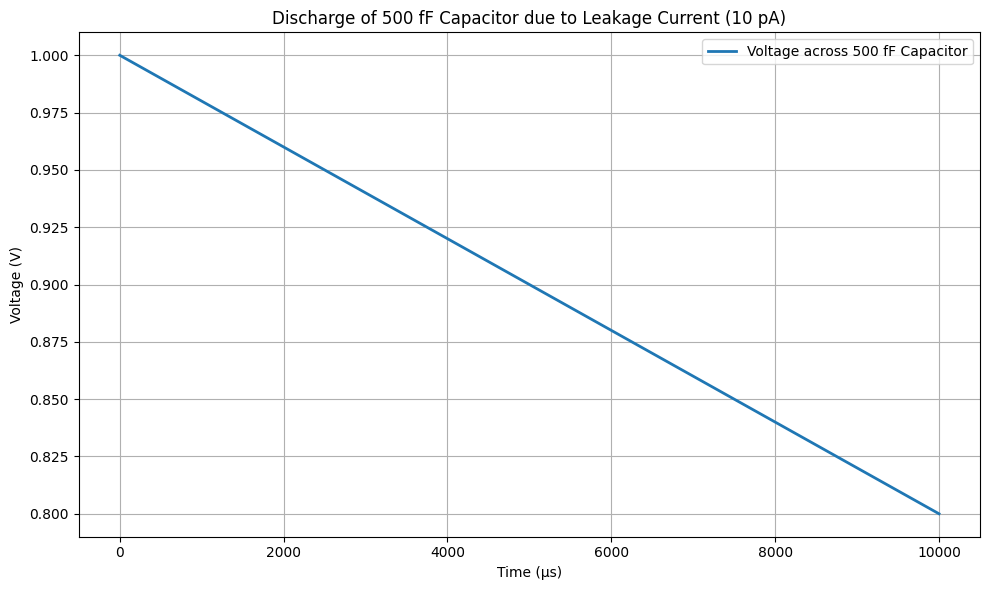

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C = 500e-15  # Capacitance in farads (500 fF)
V0 = 1.0     # Initial voltage in volts
Q0 = C * V0  # Initial charge in coulombs
I_leak = 10e-12  # Leakage current in amperes (10 pA)

# Time parameters
t_max = 10e-3  # Maximum time in seconds (1 ms)
num_points = 1000  # Number of points for the plot
t = np.linspace(0, t_max, num_points)  # Time vector

# Calculating charge over time
Q_t = Q0 - I_leak * t  # Charge at time t
Q_t[Q_t < 0] = 0  # Ensuring charge does not go below 0

# Calculating voltage over time
V_t = Q_t / C

# Plotting voltage over time
plt.figure(figsize=(10, 6))
plt.plot(t * 1e6, V_t, label='Voltage across 500 fF Capacitor', linewidth=2)
plt.xlabel('Time (µs)')
plt.ylabel('Voltage (V)')
plt.title('Discharge of 500 fF Capacitor due to Leakage Current (10 pA)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Plot simulated data

In [79]:
signal_names_map = {
    "V(adc_in)":"ADC Input",
    "V(cap_p)":"Hold Capacitor",
    "V(comp_out)":"Comparator",
    "V(cur_ctl)":"Fixed time current control",
    "V(pre_amp_signal)":"Pre-amplifier",
    "V(raw_signal)":"Raw signal",
}

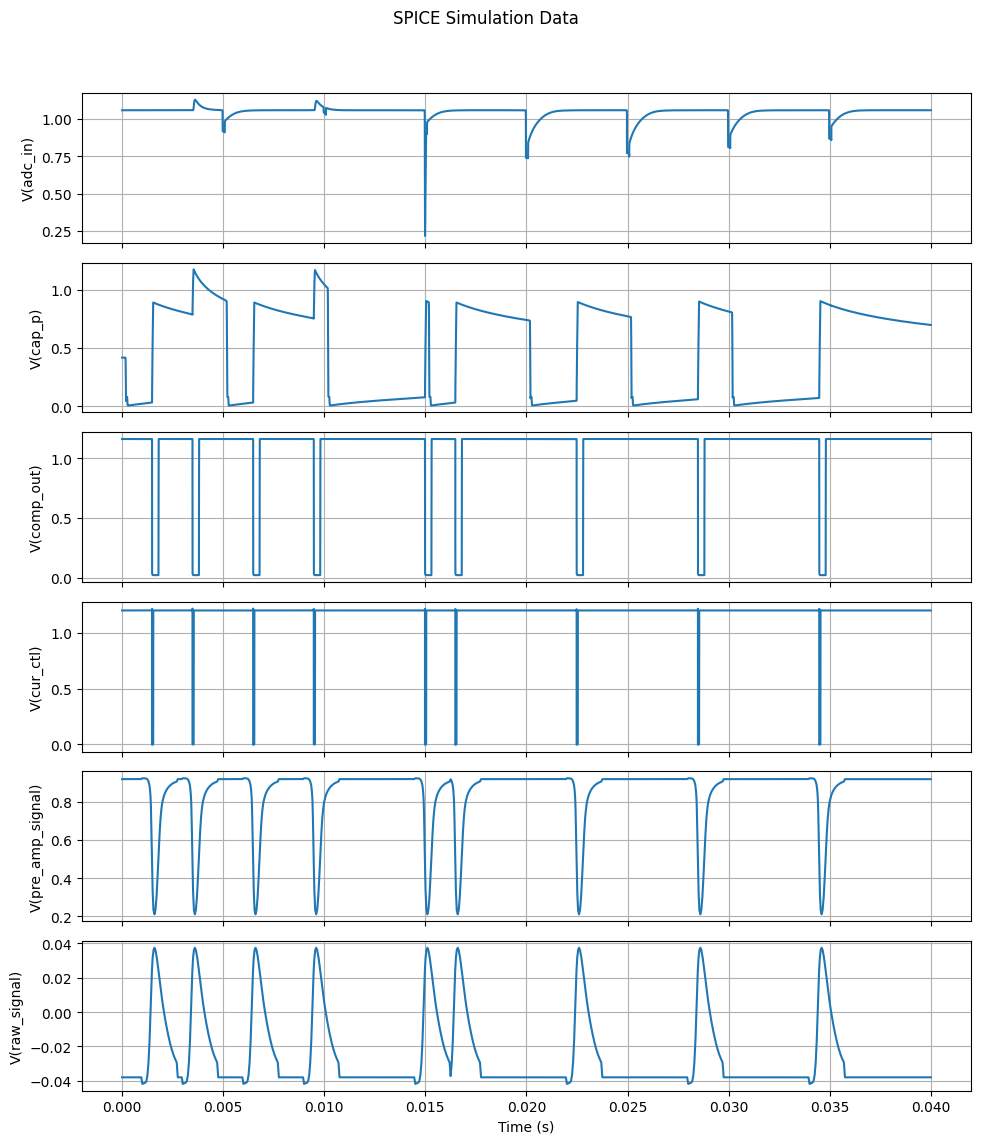

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the TSV data into a DataFrame
file_path = './sim/signals.tsv'
df = pd.read_csv(file_path, sep='\t')

# Plot the data
fig, axes = plt.subplots(len(df.columns) - 1, 1, figsize=(10, 12), sharex=True)

# Extract time and other signals
time = df['time']
columns = df.columns[1:]

for i, column in enumerate(columns):
    axes[i].plot(time, df[column])
    axes[i].set_ylabel(column)
    axes[i].grid(True)

axes[-1].set_xlabel('Time (s)')
fig.suptitle('SPICE Simulation Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [93]:
# Select a range of time
start_time = 1e-3  # specify your start time here
end_time = 5.5e-3  # specify your end time here
df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

# Remove 'V(cur_ctl)' column from the DataFrame
df = df.drop('V(cur_ctl)', axis=1)

# Multiply 'V(raw_signal') column by 1e3
df['V(raw_signal)'] *= 1e3

# Multiply 'time' column by 1e3 and map it to start from 0

df['time'] = (df['time'] - start_time) * 1e3

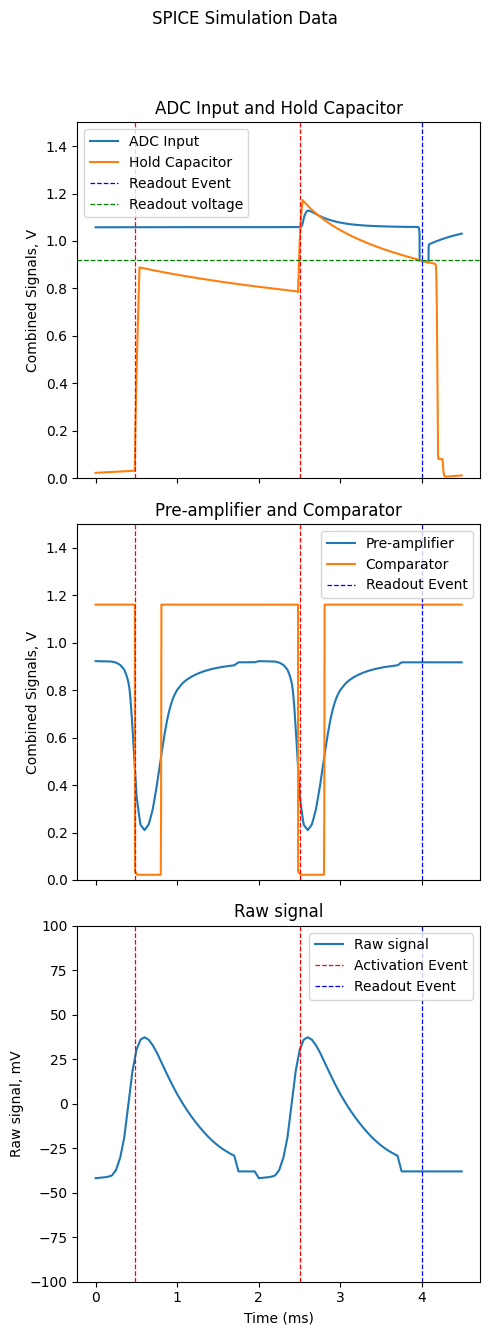

In [103]:

# Event times for vertical lines
event_time_1 = (1.48e-3 - start_time)  * 1e3  # specify event time 1
event_time_2 = (3.5e-3 - start_time)  * 1e3  # specify event time 2
readout_time = (5.0e-3 - start_time)  * 1e3 # specify readout time
readout_voltage = 0.918  # specify readout voltage

# Y-axis limits
y_min = 0.0  # specify your Y-axis minimum value
y_max = 1.5  # specify your Y-axis maximum value

aux_linewidth = 0.9

grid = False

# Plot the data
fig, axes = plt.subplots(len(df.columns) - 3, 1, figsize=(5, 14), sharex=True)

# Extract time and other signals
time = df['time']
columns = df.columns[1:]

# Plot the combined plot with two lines
combined_columns = ['V(adc_in)', 'V(cap_p)']
axes[0].plot(time, df[combined_columns[0]], label=signal_names_map[combined_columns[0]])
axes[0].plot(time, df[combined_columns[1]], label=signal_names_map[combined_columns[1]])
axes[0].axvline(x=event_time_1, color='r', linestyle='--', linewidth=aux_linewidth)
axes[0].axvline(x=event_time_2, color='r', linestyle='--', linewidth=aux_linewidth)
axes[0].axvline(x=readout_time, color='b', linestyle='--', label='Readout Event', linewidth=aux_linewidth)
axes[0].axhline(y=readout_voltage, color='g', linestyle='--', label='Readout voltage', linewidth=aux_linewidth)
axes[0].set_ylabel('Combined Signals, V')
axes[0].set_ylim(y_min, y_max)
axes[0].grid(grid)
axes[0].legend()
axes[0].set_title(f'{signal_names_map[combined_columns[0]]} and {signal_names_map[combined_columns[1]]}')


# Plot the combined plot with two other lines
combined_columns_2 = ['V(pre_amp_signal)', 'V(comp_out)']
axes[1].plot(time, df[combined_columns_2[0]], label=signal_names_map[combined_columns_2[0]])
axes[1].plot(time, df[combined_columns_2[1]], label=signal_names_map[combined_columns_2[1]])
axes[1].axvline(x=event_time_1, color='r', linestyle='--', linewidth=aux_linewidth)
axes[1].axvline(x=event_time_2, color='r', linestyle='--', linewidth=aux_linewidth)
axes[1].axvline(x=readout_time, color='b', linestyle='--', label='Readout Event', linewidth=aux_linewidth)
axes[1].set_ylabel('Combined Signals, V')
axes[1].set_ylim(y_min, y_max)
axes[1].grid(grid)
axes[1].legend()
axes[1].set_title(f'{signal_names_map[combined_columns_2[0]]} and {signal_names_map[combined_columns_2[1]]}')


for i, column in enumerate(columns[4:]):
    axes[i + 2].plot(time, df[column], label=signal_names_map[column])
    axes[i + 2].axvline(x=event_time_1, color='r', linestyle='--', label='Activation Event', linewidth=aux_linewidth)
    axes[i + 2].axvline(x=event_time_2, color='r', linestyle='--', linewidth=aux_linewidth)
    axes[i + 2].axvline(x=readout_time, color='b', linestyle='--', label='Readout Event', linewidth=aux_linewidth)
    axes[i + 2].set_title(f'{signal_names_map[column]}')  # Adding a title to each subplot
    if column != 'V(raw_signal)':
        axes[i + 2].set_ylim(y_min, y_max)
    else:
        axes[i + 2].set_ylim(-100, 100)
        # pass
    axes[i + 2].set_ylabel(f"{signal_names_map[column]}, mV")
    axes[i + 2].grid(grid)
    axes[i + 2].legend()

axes[-1].set_xlabel('Time (ms)')
fig.suptitle('SPICE Simulation Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Save svg
plt.savefig('spice_simulation_data.svg')
plt.savefig('spice_simulation_data.png', dpi=200)
plt.show()


<Figure size 640x480 with 0 Axes>